### Tratamento de dados - Clusters Gênicos Biossintéticos.

##### Neste notebook iremos realizar o tratamento dos dados de saída do BIG-Scape para compreender a similaridade dos BGC's presentes na amostra. 

In [1]:
# Iremos importar as bibliotecas necessárias
# Para criação do dataframe
import pandas as pd
import glob
import os
import seaborn as sns # essa é a biblioteca mais importante para o tratamento de dados

# Para uso gráfico
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

import pandas as pd
import seaborn as sns
from upsetplot import UpSet

In [2]:
# Criando o dataframe
network_bgc = pd.read_csv('Network_Annotations_Full.tsv', sep="\t")

In [3]:
# E qual é saída desse dado?
display(network_bgc)

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy
0,LM1_cutadapter_k141_1801.region001,k141_1801,k141_1801 flag=1 multi=3.0000 len=4285,T3PKS,PKSother,NaN,NaN
1,LM1_cutadapter_k141_2335.region001,k141_2335,k141_2335 flag=1 multi=2.0000 len=1095,T3PKS,PKSother,NaN,NaN
2,LM1_cutadapter_k141_3546.region001,k141_3546,k141_3546 flag=1 multi=4.0000 len=1147,opine-like-metallophore,Others,NaN,NaN
3,LM1_cutadapter_k141_4483.region001,k141_4483,k141_4483 flag=1 multi=3.0000 len=1153,NRPS,NRPS,NaN,NaN
4,LM1_cutadapter_k141_4633.region001,k141_4633,k141_4633 flag=1 multi=4.0000 len=2807,RiPP-like,RiPPs,NaN,NaN
...,...,...,...,...,...,...,...
419,colostrum_cutadapter_k141_7214.region001,k141_7214,k141_7214 flag=1 multi=19.0000 len=143480,redox-cofactor,RiPPs,NaN,NaN
420,colostrum_cutadapter_k141_7813.region001,k141_7813,k141_7813 flag=0 multi=12.9951 len=53899,NRP-metallophore.NRPS,Others,NaN,NaN
421,colostrum_cutadapter_k141_7841.region001,k141_7841,k141_7841 flag=0 multi=9.9947 len=37640,hydrogen-cyanide,Others,NaN,NaN
422,colostrum_cutadapter_k141_7851.region001,k141_7851,k141_7851 flag=0 multi=12.9612 len=13741,NRPS,NRPS,NaN,NaN


In [4]:
def extrair_grupo(genoma):
    '''  
    Extrai o grupo a partir do nome do genoma, com base em palavras-chave específicas.
    
    Parâmetros:
        genoma (str): Nome do genoma a ser analisado.
    
    Retorna:
        str: O grupo extraído do nome do genoma ou o nome completo se nenhuma condição for atendida.
    '''

    if "colostrum" in genoma or "LM1" in genoma:
        return genoma.split("_", 1)[0]
    
    elif "baby_1month" in genoma or "baby_6month" in genoma:
        partes = genoma.split("_", 2)  
        return "_".join(partes[:2]) if len(partes) > 1 else genoma
    
    return genoma


In [5]:
network_bgc['group'] = network_bgc['BGC'].apply(extrair_grupo)

In [6]:
network_bgc

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,group
0,LM1_cutadapter_k141_1801.region001,k141_1801,k141_1801 flag=1 multi=3.0000 len=4285,T3PKS,PKSother,NaN,NaN,LM1
1,LM1_cutadapter_k141_2335.region001,k141_2335,k141_2335 flag=1 multi=2.0000 len=1095,T3PKS,PKSother,NaN,NaN,LM1
2,LM1_cutadapter_k141_3546.region001,k141_3546,k141_3546 flag=1 multi=4.0000 len=1147,opine-like-metallophore,Others,NaN,NaN,LM1
3,LM1_cutadapter_k141_4483.region001,k141_4483,k141_4483 flag=1 multi=3.0000 len=1153,NRPS,NRPS,NaN,NaN,LM1
4,LM1_cutadapter_k141_4633.region001,k141_4633,k141_4633 flag=1 multi=4.0000 len=2807,RiPP-like,RiPPs,NaN,NaN,LM1
...,...,...,...,...,...,...,...,...
419,colostrum_cutadapter_k141_7214.region001,k141_7214,k141_7214 flag=1 multi=19.0000 len=143480,redox-cofactor,RiPPs,NaN,NaN,colostrum
420,colostrum_cutadapter_k141_7813.region001,k141_7813,k141_7813 flag=0 multi=12.9951 len=53899,NRP-metallophore.NRPS,Others,NaN,NaN,colostrum
421,colostrum_cutadapter_k141_7841.region001,k141_7841,k141_7841 flag=0 multi=9.9947 len=37640,hydrogen-cyanide,Others,NaN,NaN,colostrum
422,colostrum_cutadapter_k141_7851.region001,k141_7851,k141_7851 flag=0 multi=12.9612 len=13741,NRPS,NRPS,NaN,NaN,colostrum


### Histograma

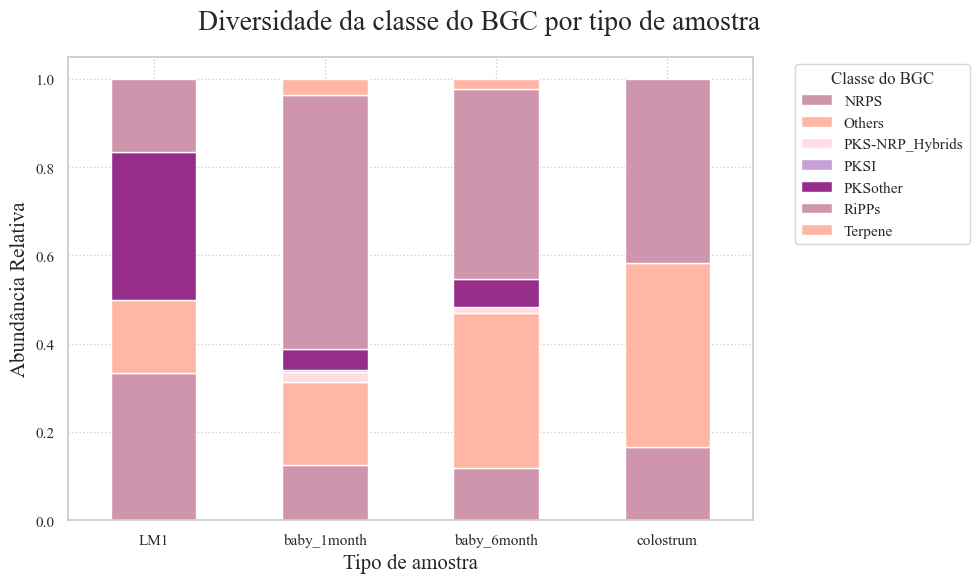

In [7]:
# Configurações de estilo
sns.set_context("notebook")
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['font.family'] = 'Times New Roman'

# Definindo as cores das barras com os códigos hexadecimais da sua escola
cores_personalizadas = ['#ce95ac', '#ffb6a5', '#ffdde0', '#c6a0d8', '#962d8a']  # Substitua pelos códigos corretos

# Passo 1: Contar a ocorrência de cada classe por grupo
class_counts = network_bgc.groupby(['group', 'BiG-SCAPE class']).size().unstack(fill_value=0)

# Passo 2: Calcular a abundância relativa
class_relative_abundance = class_counts.div(class_counts.sum(axis=1), axis=0)

# Passo 3: Plotar as barras empilhadas
ax = class_relative_abundance.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores_personalizadas)
plt.ylabel("Abundância Relativa",fontsize=15)
plt.xlabel("Tipo de amostra", fontsize=15)
plt.title("Diversidade da classe do BGC por tipo de amostra", fontsize=20, pad=20, x=0.6)

# Rotacionar os rótulos no eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.legend(title='Classe do BGC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.85)
plt.tight_layout()

# Exibir e salvar o gráfico
plt.savefig("diversidade_bgc.png")
plt.show()
